In [2]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [3]:
# load dataset
df=pd.read_csv("bank.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# display columns in dataset
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [6]:
# display shape of dataset
print('dataset has {0} rows and {1} column'.format(df.shape[0],df.shape[1]))

dataset has 4521 rows and 17 column


In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
# checking missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

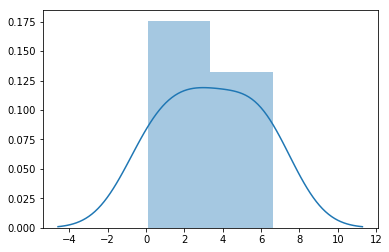

In [9]:
target = df.skew()
sb.distplot(target)

In [10]:
df.isnull().values.any()

False

In [11]:
# replace value -1,1 for <=50K/>50K
df['y'].replace('yes',1,inplace=True)
df['y'].replace('no',0,inplace=True)

In [12]:
df['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

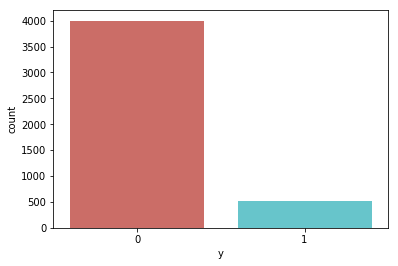

In [13]:
sb.countplot(x='y',  data=df, palette='hls')
plt.show()

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(4521, 17)

In [16]:
# convert  categorical data into binary data
df = pd.get_dummies(df)
df.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [17]:
df.shape

(4521, 52)

In [18]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [19]:
df = Feature_Scaling(df)

In [20]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.326031,0.063565,0.497176,0.086051,0.036605,0.046751,0.021703,0.115240,0.105729,0.209246,...,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509
std,0.155533,0.040397,0.274922,0.086017,0.063465,0.114818,0.067742,0.319347,0.307524,0.406815,...,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,0.045395,0.266667,0.033102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.294118,0.050429,0.500000,0.059914,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.441176,0.064335,0.666667,0.107580,0.040816,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# split data into train and test
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
        
    return train,test

In [22]:
train,test = Split(df)
train_data=df.head(train)
test_data=df.tail(test)

In [23]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.y
    return df.drop('y', axis=1), output

In [24]:
train_data_x,train_data_y = separate(train_data)
test_data_x,test_data_y=separate(test_data)

In [25]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,...,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,0.326031,0.063565,0.497176,0.086051,0.036605,0.046751,0.021703,0.115240,0.105729,0.209246,...,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502,0.108383,0.043574,0.028534,0.819509
std,0.155533,0.040397,0.274922,0.086017,0.063465,0.114818,0.067742,0.319347,0.307524,0.406815,...,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640,0.310898,0.204169,0.166510,0.384638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,0.045395,0.266667,0.033102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.294118,0.050429,0.500000,0.059914,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.441176,0.064335,0.666667,0.107580,0.040816,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
import random
import math
import operator


class KNN_Algorithm:
    def __init__(self):
        self.k = 5
        
#     calculate distance between two data instance
    def euclidien(self,test,train,test_lenth):
        distance = 0
        for l in range(test_lenth):
            distance += pow(test[l]-train[l],2)
#         print("distance",distance)
        return math.sqrt(distance)
        
#         get neighbors having atleast distance from new point
    def find_neighbours(self,x_train_data,y_train_data,x_test_data, k):
        distances = []
        test_lenth = len(x_test_data)-1
        for i in range(len(x_train_data)):
            dist = self.euclidien(x_test_data,x_train_data[i],test_lenth)
            distances.append((y_train_data[i],dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors =  []
        for k in range(k):
            neighbors.append(distances[k][0])
#         print("neighbor",neighbors)
        return neighbors
        
        
#       get response and decide which class it belongs 
    def getResponse(self,neighbors):
        classVotes = {}
#         print("neigh:",neighbors)
        for x in range(len(neighbors)):
            response = neighbors[x]
            if response in classVotes:
                classVotes[response] += 1
            else:
                classVotes[response] = 1
                
#             print("CLASS :",classVotes)
        sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
#         print("sortedVotes",sortedVotes)
        return sortedVotes[0][0]
#         return classVotes[0][0]
    
#     calculate accuracy
    def getAccuracy(self,y_test_data, predictions):
        correct = 0
        for y in range(len(y_test_data)):
            if y_test_data[y] == predictions[y]:
                correct += 1
        return (correct/float(len(y_test_data))) * 100.0
        
        
def main():
    obj = KNN_Algorithm()
    # calling method by class object
    x_train_data = np.array(train_data_x[:2000])
#     print("x_train_data:",x_train_data.shape)
    y_train_data = np.array(train_data_y[:2000])
     
    x_test_data = np.array(test_data_x[:200])
#     print("x_test_data:",x_test_data.shape)
    y_test_data = np.array(test_data_y[:200])
    
#     generate predictions
    predictions=[]
    k = 5
    for x in range(len(x_test_data)):
        neighbors = obj.find_neighbours(x_train_data,y_train_data,x_test_data[x], k)
        result = obj.getResponse(neighbors)
        predictions.append(result)
#         print('> predicted=' + repr(result) + ', actual=' + repr(y_test_data[x]))
    accuracy = obj.getAccuracy(y_test_data, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

    
main()


Accuracy: 89.0%
